<a href="https://colab.research.google.com/github/sijuswamy/Algorithmic-Thinking-FDP/blob/main/Linear_Regression_Academic_Tribe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Linear Regression Models in Machine Learning (Academic Tribe)

## Introduction
Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting. Different regression models differ based on – the kind of relationship between dependent and independent variables, they are considering and the number of independent variables being used.

## Linear Regression Job

Linear regression performs the task to predict a dependent variable value ($y$) based on a given independent variable ($x$). So, this regression technique finds out a linear relationship between $x$ (input) and $y$(response). Hence, the name is Linear Regression.
 For example $X$ (input) is the work experience and $Y$ (output) is the salary of a person. The regression line is the best fit line for our SLR model.

## Hypothesis of SLRM

The proposed model is $$h_\theta(x)=\theta_0+\theta_1 x$$, where $\theta_0$ is the intercept of the line and $\theta_1$ is the slope. In case of multiple linear regression the vector form of LR is $$h_\theta=\theta^TX+\theta_0$$

where $\theta=(\theta_1,\theta_2\ldots,\theta_n)^T$

The hypothesis are:

> $H_0$: $\theta_1=0$

> $H_1$: $\theta_1\neq 0$

While training the model we are given :

>1.$x$: input training data (univariate – one input variable(parameter))

>2.$y$: labels to data (supervised learning)

>3.When training the model – it fits the best line to predict the value of y for a given value of x. The model gets the best regression fit line by finding the best $\theta_0$ and $\theta_1$ values.
$\theta_0$: intercept
$\theta_1$: coefficient of x

## Moving in SLR model building
Once we find the best $\theta_0$ and $\theta_1$ values, we get the best fit line. So when we are finally using our model for prediction, it will predict the value of $y$ for the input value of $x$.

## 1. Least square error method

In this method, we simply calculate the parameters $\theta_0$ and $\theta_1$ can be calculated using the following algebraic expressions:

\begin{align*}
\theta_1&=\dfrac{\sum\limits_{i=1}^m\left(x_i-\bar{x}\right)\left(y_i-\bar{y}\right)}{\sum\limits_{i=1}^m\left(x_i-\bar{x}\right)^2}\\
\theta_0&=\bar{y}-\theta_1\bar{x}
\end{align*}



In [1]:

import numpy as np
x=np.array([1,2,3,4,5,6,7,8])
y=4*x+6.754
nr=np.sum((np.multiply(y-np.mean(y),x-np.mean(x))))
dnr=np.sum((x-np.mean(x))**2)
# print(nr)
# print(dnr)
theta_1=nr/dnr
theta_0=np.mean(y)-theta_1*np.mean(x)
print("slope :",theta_1)
print("Intercept :",theta_0)

slope : 4.0
Intercept : 6.753999999999998


## Direct method in statistics

In [2]:
import statsmodels.api as sm
# Note the difference in argument order
model = sm.OLS(y, x).fit()
predictions = model.predict(x) # make the predictions by the model

# Print out the statistics
model.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              512.3
Date:                Wed, 24 Jul 2024   Prob (F-statistic):                    8.32e-08
Time:                        08:30:50   Log-Likelihood:                         -20.311
No. Observations:                   8   AIC:                                      42.62
Df Residuals:                       7   BIC:                                      42.70
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.1919      0.229     22.635      0.000       4.649       5.734
==============================================================================
Omnibus:                        0.679   Durbin-Watson:                   0.132
Prob(Omnibus):                  0.712   Jarque-Bera (JB):                0.511
Skew:                           0.000   Prob(JB):                        0.775
Kurtosis:                       1.762   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ordinary Least Square method looks simple and computation is easy. But, this OLS method will only work for a univariate dataset which is single dependent variable and single independent variable. Multi-variate dataset contains a single dependent variable and multiple independent variable sets, forced us to use a machine learning algorithm called “Gradient Descent”.

## Optimizing Regression line- Gradient descent method

**Updating $\theta_0$ and $\theta_1$ values to get the best fit line**.

 While learning linear regression ML course, two functions are introduced:

1. the cost function
2. gradient descent

**What is a Cost Function?**

In the case of gradient descent, the objective is to find a line of best fit for some given inputs, or X values, and any number of Y values, or outputs. A cost function is defined as:

>…a function that maps an event or values of one or more variables onto a real number intuitively representing some “cost” associated with the event.
from Wikipedia

In this situation, the event we are finding the cost of is the difference between estimated values, or the hypothesis and the real values — the actual data we are trying to fit a line to.

By achieving the best-fit regression line, the model aims to predict y value such that the error difference between predicted value and true value is minimum. So, it is very important to update the $\theta_0$ and $\theta_1$ values, to reach the best value that minimize the error between predicted y value (pred) and true y value (y).

The cost function in the case of SLR is the $MSE$ in prediction. Formally it can be defined as:

$$ J(\theta_0,\theta_1)=\frac{1}{2m}\sum\limits_{i=1}^m\left(h_\theta(x^i)-\hat{y}^i\right)^2$$

Using Gradient descent algorithm , we will figure out a minimal cost function by applying various parameters for $\theta_0$ and $\theta_1$ and see the slope intercept until it reaches convergence.

>In a real world example, it is similar to find out a best direction to take a step downhill.

We take a step towards the direction to get down. From the each step, you look out the direction again to get down faster and downhill quickly. The similar approach is using in this algorithm to minimise cost function.


## Gradient Descent for Linear Regression

The gradient descent for the SLR cost function can be found using Classical calculus method. Since the cost function contains the parameters $\theta_0$ and $\theta_1$, the partial derivative curresponding to these parameters together defines the gradient. Mathematically

\begin{align*}
\dfrac{\partial}{\partial \theta_0}\left(J(\theta_0,\theta_1)\right)&=\dfrac{\partial}{\partial \theta_0}\left(\frac{1}{2m}\sum\limits_{i=1}^m\left(h_\theta(x^i)-\hat{y}^i\right)^2\right)\\
\dfrac{\partial}{\partial \theta_1}\left(J(\theta_0,\theta_1)\right)&=\dfrac{\partial}{\partial \theta_1}\left(\frac{1}{2m}\sum\limits_{i=1}^m\left(h_\theta(x^i)-\hat{y}^i\right)^2\right)
\end{align*}

>Why do we use partial derivative in the equation? Partial derivatives represents the rate of change of the functions as the variable change. In our case we change values for theta 0 and theta 1 and identifies the rate of change.

To apply rate of change values for theta 0 and theta 1, the below are the equations for theta 0 and theta 1 to apply it on each epoch.

\begin{align*}
\theta_0'&=\frac{1}{m}\sum\limits_{i=1}^m\left(h_\theta(x^i)-\hat{y}^i\right)\\
\theta_1'&=\frac{1}{m}\sum\limits_{i=1}^m\left(h_\theta(x^i)-\hat{y}^i\right)x^i
\end{align*}

To find the best minimum cost, repeat steps to apply various values for $\theta_0$ and $\theta_1$. In other words, repeat steps until convergence evaluate the following:

\begin{align*}
\theta_0^{(i+1)}&=\theta_0^i-\eta\theta_0'^{(i)}\\
\theta_1^{(i+1)}&=\theta_1^i-\eta\theta_1'^{(i)}\\
\end{align*}

where $\eta$ is the learning rate.


## Multiple Linear regression
In the case of multiple linear regression, we have an input vector $X$ and the ground truth is $\hat{y}$. The cost function in the case of MLR is the $MSE$ in prediction. Formally it can be defined as:

$$ J(\theta)=\frac{1}{2m}\sum\limits_{i=1}^m\left(h_\theta(X^i)-\hat{y}^i\right)^2$$. Now the minimum direction is found by calculating gradient. Here we will have more partial derivatives like:
\begin{align*}
\theta_0'&=\frac{1}{m}\sum\limits_{i=1}^m\left(h_\theta(X^i)-\hat{y}^i\right)\\
\theta_1'&=\frac{1}{m}\sum\limits_{i=1}^m\left(h_\theta(X^i)-\hat{y}^i\right)x_1^i\\
\theta_2'&=\frac{1}{m}\sum\limits_{i=1}^m\left(h_\theta(X^i)-\hat{y}^i\right)x_2^i\\
\cdots&\cdots
\end{align*}

Now the updates in $\theta$ will be summarized as:
    \begin{align*}
\theta_0^{(i+1)}&=\theta_0^i-\eta\theta_0'^{(i)}\\
\theta_1^{(i+1)}&=\theta_1^i-\eta\theta_1'^{(i)}\\
\theta_2^{(i+1)}&=\theta_2^i-\eta\theta_2'^{(i)}\\
\cdots&\cdots
\end{align*}

# Example: Gradient descent in Python from scratch
## Case 1: Simple Linear regression

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt# ensure to use matplot library for plotting
np.random.seed(43)# ensure reproducible research
X=2*np.random.rand(100,1)# a column of 100 random numbers
y=4+3*X+np.random.rand(100,1)
X_b=np.concatenate([np.ones((100,1)), X], axis=1)# reformulate X
eta=0.1 # define learning rate
n_iter=1000 # number of epochs
m=100 # number of samples
theta=np.random.rand(2,1) # create an initial setup for theta
for ind in range(n_iter):
    grad=1/m*X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-eta*grad
print(theta)
y_p=X_b.dot(theta)
#print(y_p.T) # predicted values
#print(y) # actual values

[[4.51454832]
 [2.99817352]]


## Case 2: Multiple linear regression

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt# ensure to use matplot library for plotting
np.random.seed(42)# ensure reproducible research
X=2*np.random.rand(100,2)# two columns of 100 random numbers
t=np.array([2,1])
y=4+np.dot(X,t.T).reshape(100,1)+np.random.rand(100,1)
X_b=np.concatenate([np.ones((100,1)), X], axis=1)# reformulate X
eta=0.1 # define learning rate
n_iter=1000 # number of epochs
m=100 # number of samples
theta=np.random.rand(3,1) # create an initial setup for theta
for ind in range(n_iter):
    grad=1/m*X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-eta*grad
print(theta)
y_p=X_b.dot(theta)
#print(y_p.T) # predicted values
#print(y) # actual values

[[4.55222768]
 [2.00029634]
 [0.96414812]]


# 2. Using Scikit-learn machine learning libray in Python

We know that linear regression is a popular technique and we might as well seen the mathematical equation of linear regression.  There are several ways in which we can do that, we can do linear regression using numpy, scipy, stats model and sckit learn. But in this post I am going to use scikit learn to perform linear regression.

Scikit-learn is a powerful Python module for machine learning. It contains function for regression, classification, clustering, model selection and dimensionality reduction. Today, I will explore the sklearn.linear_model module which contains “methods intended for regression in which the target value is expected to be a linear combination of the input variables”.

**Important points**: Important functions to keep in mind while fitting a linear regression model are:

>1. `lm.fit()` -> fits a linear model

>2. `lm.predict()` -> Predict Y using the linear model with estimated coefficients

>3. `lm.score()` -> Returns the coefficient of determination ($R^2$). A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model.

# A direct regression problem with sklearn library- Piza price model

## 1. reading data

In [5]:
import numpy as np
X=[6,8,10,14,18]# reading as a list
Y=[7,9,13,17.5,18]
X=np.array(X).reshape(5,1) # converting list to a numpy array
Y=np.array(Y).reshape(5,1)


In [6]:
Y

array([[ 7. ],
       [ 9. ],
       [13. ],
       [17.5],
       [18. ]])

## 2.a Visualizing as a scatter plot using Matplotlib

<ipython-input-7-98d8183f438c>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


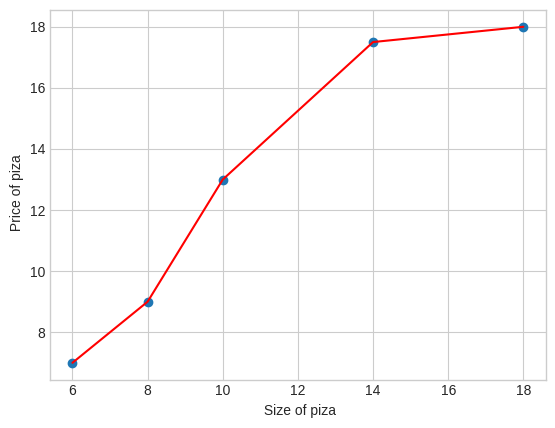

In [7]:
import matplotlib.pyplot as plt# ensure to use matplot library for plotting
plt.style.use('seaborn-whitegrid')
plt.xlabel(" Size of piza")
plt.ylabel(" Price of piza")
plt.scatter(X,Y)
plt.plot(X,Y,'r')
plt.show()

## 2.b Finding linear regression model parameters statistically

$var(x)=\frac{\sum_{i=1}^n(x-\bar{x})^2}{n-1}$

$\theta_1=\frac{
cov(x,y)}{var(x)}$;

$\theta_0=\bar{y}-\theta_1*\bar{x}$

$R^2=1-\frac{SS_{res}}{SS_{tot}}$

$SS_{res}=\sum_{i=1}^n(y_i-f(x_i))^2$

$SS_{tot}=\sum_{i=1}^n(y_i-\bar{y})^2$

In [8]:
xL=[i[0] for i in X]
yL=[i[0] for i in Y]
var_x=np.var(xL,ddof=1)# d degrees of freedom
cov_xy=np.cov(xL,yL,ddof=1)[0][1]
print(var_x)
print(cov_xy)
xbar=np.mean(xL)
ybar=np.mean(yL)
theta_1=cov_xy/var_x
theta_0=ybar-(theta_1*xbar)
print("Intercept:",theta_0)
y_p=theta_0+theta_1*X
print("Slope: ", theta_1)

23.2
22.650000000000002
Intercept: 1.9655172413793096
Slope:  0.976293103448276


> The regression equation is: $y=1.965+0.9762 x$

## 3. Creating the model and finding parameters

In [9]:
#loading the machine learning library
from sklearn.linear_model import LinearRegression
# creating an instance of the Linear Regression
model=LinearRegression()

In [10]:
# train the model
model.fit(X,Y)

LinearRegression()

In [11]:
print('estimated Intercept:',model.intercept_)
print('number of coefficients',len(model.coef_))
print(' coefficients',model.coef_)

estimated Intercept: [1.96551724]
number of coefficients 1
 coefficients [[0.9762931]]


## Saving the model

In [12]:
import joblib

# save model with joblib
filename = 'joblib_model.sav'
joblib.dump(model, filename)

['joblib_model.sav']

## 4. Predict using scikit learn library

In [13]:
# new data for testing
x_test=np.array([8,9,11,16,12]).reshape(5,1)
y_test=np.array([11,8.5,15,18,11]).reshape(5,1)
# predict the model ouput on the new data
yp_test=model.predict(x_test)
print(y_test-yp_test)
#print(y_test)

[[ 1.22413793]
 [-2.25215517]
 [ 2.29525862]
 [ 0.4137931 ]
 [-2.68103448]]


In [16]:
# load model with joblib
loaded_model = joblib.load(filename)

# evaluate model
y_predict = loaded_model.predict(x_test)

# check results
print(y_test-y_predict)

[[ 1.22413793]
 [-2.25215517]
 [ 2.29525862]
 [ 0.4137931 ]
 [-2.68103448]]


## Finding skill of the model

In [ ]:
# print the R^2 value (coefficient of determination) if R^2 value is greater than 0.75, we accept the model
print(model.score(X,Y))

In [ ]:
print(model.score(x_test,y_test))

## 5. plotting the fitted line using test data

In [ ]:
plt.title("Piza price plotted against diameter")
x_fit=np.linspace(0,50)
y_fit=theta_0+theta_1*x_fit
plt.axis([0, 25, 0, 25])
plt.plot(x_test,y_test,'k.')
plt.plot(x_fit,y_fit,color="blue")
plt.show()

## 6. Visualizing error in prediction

In [ ]:
plt.title("Residual line plots")
plt.axis([0, 25, 0, 25])
plt.plot(x_test,y_test,'k.')
plt.plot(x_fit,y_fit,color="blue")
for i in range(0,len(x_test)):
    plt.plot([x_test[i], x_test[i]], [yp_test[i], y_test[i]], color='red', linewidth=1)
plt.show()

## Polynomial regression using scikit learn

A linear regression will always have first degree parameters. Example $y=\theta_0+\theta_1x$ (simple linear regression). Now there are polynomial regression also: $y_p=\theta_0+\theta_1 x^2$.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polyftquadra=PolynomialFeatures(degree=2)
Xq_train=polyftquadra.fit_transform(X) # X is the training data
Xq_test=polyftquadra.fit_transform(x_test)#transforming input to quadratic way
print(Xq_train)
print(Xq_test)

In [ ]:
# train the model

modelQ=LinearRegression()
modelQ.fit(Xq_train,Y)
modelQ.predict(Xq_test)
prval=[i[0] for i in modelQ.predict(Xq_test)]#copy values as a list
R=modelQ.score(Xq_test,y_test)
print(R)
plt.plot(x_test,y_test,'k.')
plt.plot(x_test,modelQ.predict(Xq_test))
plt.show()

In [ ]:
# Generate a cubic model
from sklearn.preprocessing import PolynomialFeatures
polyftcubic=PolynomialFeatures(degree=3)
Xc_train=polyftcubic.fit_transform(X)
Xc_test=polyftcubic.fit_transform(x_test)#transforming input to quadratic way
modelC=LinearRegression()
modelC.fit(Xc_train,Y)
#prvc=[i[0] for i in modelC.predict(Xc_test)]
plt.plot(x_test,modelC.predict(Xc_test))
modelC.score(Xc_test,y_test) # here R^2 value is less than 0.75, the model is not acceptable.

## Loading data from the `.csv` file

In [ ]:
import pandas as pd

In [ ]:
# open csv file with pandas
df=pd.read_csv("/content/Linear_regression.csv")

In [ ]:
df.head()

## Connecting to a `github` repository data

In [ ]:
df1=pd.read_csv("https://raw.githubusercontent.com/sijuswamy/PyWorks/main/Linear_regression.csv")

In [ ]:
df1.head()

In [ ]:
X=df1.iloc[:,0].values# create input data
Y=df1.iloc[:,1].values# create output data

In [ ]:
X=X.reshape(len(X),1) # reshaping the data
Y=Y.reshape(len(Y),1)

In [ ]:
# creating an instance of the Linear Regression
model=LinearRegression()

In [ ]:
model.fit(X,Y)

In [ ]:
model.intercept_

In [ ]:
model.coef_